In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
        precision_score,
            recall_score,
                f1_score,
                    confusion_matrix,
                        classification_report,
                            roc_auc_score
                            )

In [4]:
df = pd.read_csv("loan_data.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
y = df['Loan_Status']   # target column

X = df.drop(columns=['Loan_Status', 'Loan_ID'])   # features

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# If it contains 'Y'/'N':
y_test = y_test.map({'N': 0, 'Y': 1})
y_train = y_train.map({'N': 0, 'Y': 1})

# If it’s float with 0.0/1.0, convert to int
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [16]:
# Convert Loan_Status to 0/1
df['Loan_Status'] = df['Loan_Status'].str.strip().str.upper().map({'Y':1,'N':0})

# Drop rows where Loan_Status is missing
df = df.dropna(subset=['Loan_Status'])
df['Loan_Status'] = df['Loan_Status'].astype(int)

In [17]:
# Categorical columns
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for col in cat_cols:
    if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

            # Numerical columns
            num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
            for col in num_cols:
                if col in df.columns:
                        df[col] = df[col].fillna(df[col].median())

In [18]:
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
            df[col] = le.fit_transform(df[col].astype(str))

In [19]:
y = df['Loan_Status']
X = df.drop(columns=['Loan_Status','Loan_ID'], errors='ignore')  # ignore if Loan_ID doesn't exist

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("=== Model Evaluation Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

=== Model Evaluation Metrics ===
Accuracy: 0.8181818181818182
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889
ROC-AUC Score: 0.6062925170068028

Confusion Matrix:
 [[ 7 14]
 [ 0 56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Store metrics in variables
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Now you can print them
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8181818181818182
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889
ROC-AUC Score: 0.6062925170068028

Confusion Matrix:
 [[ 7 14]
 [ 0 56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



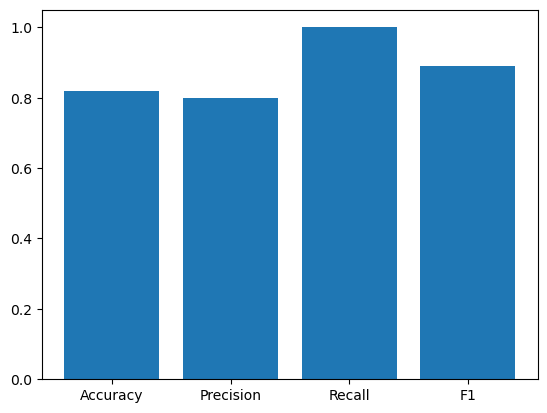

In [23]:
import matplotlib.pyplot as plt
plt.bar(['Accuracy','Precision','Recall','F1'], [accuracy, precision, recall, f1])
plt.show()

In [24]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("=== Model Evaluation Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

=== Model Evaluation Metrics ===
Accuracy: 0.8181818181818182
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889
ROC-AUC Score: 0.6062925170068028

Confusion Matrix:
 [[ 7 14]
 [ 0 56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



In [25]:
# classification_report output as dict
class_report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert to DataFrame
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Save to CSV
class_report_df.to_csv("classification_report_per_class.csv", index=True)

print("Per-class metrics saved to classification_report_per_class.csv")

Per-class metrics saved to classification_report_per_class.csv
